# <font size='6' color='darkorange' face='Courier New'>**Medical Data Visualizer**</font>
<hr style="color: grey; border-style: solid; border-width: 2px; font-weight: bold;">

In [ ]:
# импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('dark_background')

In [ ]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('medical_examination.csv')

In [ ]:
# получение первых 5 строк таблицы df
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Добавьте к данным столбец с избыточным весом.
Чтобы определить, есть ли у человека избыточный вес, сначала рассчитайте его ИМТ, разделив его вес в килограммах на квадрат его роста в метрах.
Если это значение > 25, то у человека избыточный вес. Используйте значение 0 для `NOT` избыточного веса и значение 1 для избыточного веса.

In [ ]:
# рассчитаем ИМТ
# Используем метод astype(), чтобы принудительно задать тип данных и создадим новую колонку
BMI_01 = (df['weight'] / (df['height'] / 100) ** 2) > 25
df['ex_weight'] = BMI_01.astype('uint8')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ex_weight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


## Нормализуйте данные, сделав 0 всегда хорошим, а 1 всегда плохим.
Если значение `холестерина` или `глюка` равно 1, сделайте значение 0. Если значение больше 1, сделайте значение 1.

In [ ]:
# используем словарь и функцию map() - котрая возвращат объект map(итератор)
w = {1: 0, 2: 1, 3: 1} # создаем словарь
df['cholesterol'] = df['cholesterol'].map(w) # применяем ф. map() для колонки cholesterol
df['gluc'] = df['gluc'].map(w) # применяем ф. map() для колонки gluc
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ex_weight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


## Преобразуйте данные в длинный формат и создайте диаграмму.
Диаграмма должна показывать количество значений категориальных признаков, используя функцию `catplot() Seaborn`. Набор данных должен быть разделен на `Cardio` , чтобы для каждого значения `Cardio` была одна диаграмма.

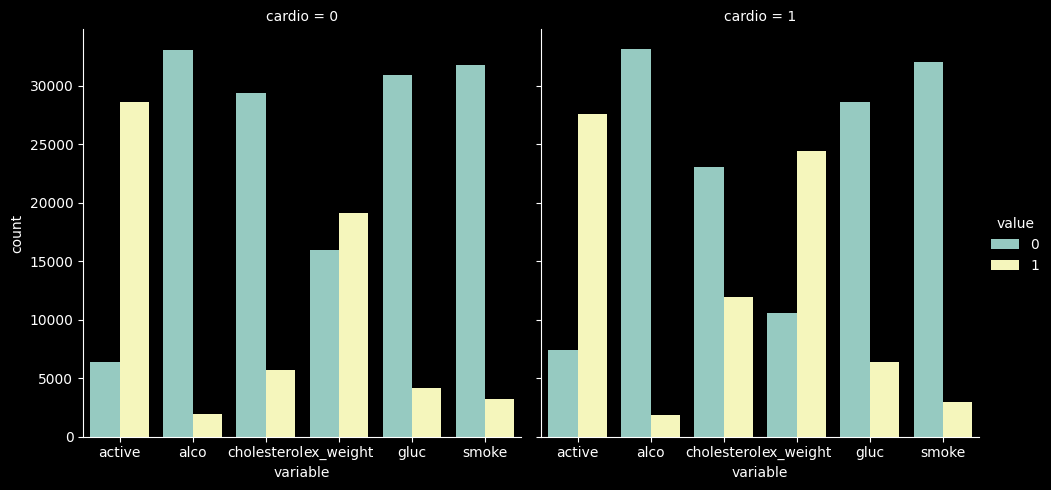

In [ ]:
# используем функцию melt для построения графика
# применим библиотеку seaborn (график catplot)
df_catplot = df.melt(id_vars = ['cardio'], value_vars = sorted(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'ex_weight']))
cat = sns.catplot(data = df_catplot, kind ='count', x = 'variable', hue = 'value', col = 'cardio')

## Очистите данные.
Отфильтруйте следующие сегменты пациентов, которые представляют неверные данные:
  * диастолическое давление выше систолического (сохраняйте правильные данные с помощью `(df['ap_lo'] <= df['ap_hi']))`
  * высота меньше 2,5-го процентиля (сохраните правильные данные с помощью `(df['height'] >= df['height'].quantile(0.025)))`
рост больше 97,5-го процентиля
  * вес меньше 2,5-го процентиля
  * вес больше 97,5-го процентиля

In [ ]:
df_heat = \
df[(df['ap_lo'] <= df['ap_hi']) &
(df['height'] >= df['height'].quantile(0.025)) &
(df['height'] <= df['height'].quantile(0.975)) &
(df['weight'] >= df['weight'].quantile(0.025)) &
(df['weight'] <= df['weight'].quantile(0.975))]
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ex_weight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


## Создайте матрицу корреляции, используя набор данных.
 Постройте матрицу корреляции, используя тепловую карту `Seaborn()`. Замаскируйте верхний треугольник.

In [ ]:
# рассчитаем корреляционную матрицу
corr_heat = df_heat.corr()
corr_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ex_weight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [ ]:
# создадим маску для верхнего треугольника
# triu() является методом в NumPy, который возвращает нижний треугольник любой заданной ему матрицы
mask = np.triu(corr_heat)
mask

array([[ 1.00000000e+00,  2.50729691e-03,  3.42610273e-03,
         3.25916709e-04,  1.49333224e-04,  3.49238023e-03,
         4.83670793e-04,  3.71939143e-03,  2.28909034e-03,
        -2.73227725e-03, -7.08059804e-04,  5.89114223e-03,
         3.90011059e-03, -6.79420314e-04],
       [ 0.00000000e+00,  1.00000000e+00, -1.81320052e-02,
        -7.69318347e-02,  7.01683896e-02,  1.86894095e-02,
         1.53507973e-01,  1.29996176e-01,  8.69901449e-02,
        -4.43706471e-02, -2.69695382e-02, -1.14451266e-02,
         2.40241089e-01,  8.95726547e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.05784851e-01,  1.29979320e-01,  5.06250408e-03,
         5.99466484e-02, -3.76050443e-02, -2.13573847e-02,
         3.37435881e-01,  1.68637124e-01,  7.86370242e-03,
         2.31999158e-03, -5.29296848e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.51502865e-01,  4.58573625e-03,
         1.79224331e-02, -6.35217890e-02, -3.

<Axes: >

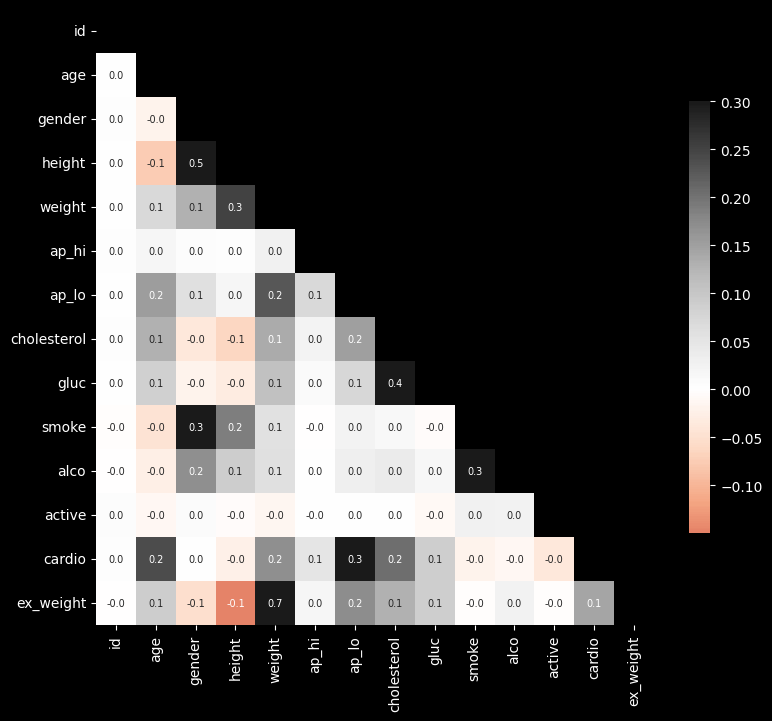

In [ ]:
# настроим фигуры matplotlib
fig = plt.subplots(figsize=(9, 8))

# построим тепловую карту с маской
sns.heatmap(data = corr_heat, annot = True, fmt='.1f', cmap = 'RdGy', mask = mask, annot_kws={'fontsize':7},
                                    cbar_kws = {'shrink': .7}, square = False, center = 0, vmax = 0.30)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)